In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

first, lets decide what kind of universe you want to live by setting some parameters

In [3]:
class params():
    def __init__(self):
        # lcdm
        self.omega_b = 0.022383
        self.omega_c = 0.12011
        self.theta_MC = 1.040909 / 100
        self.tau_reio = 0.0543
        self.ln10_p10_A_s = 3.0448
        self.n_s = 0.96605

        self.omega_m = 0.14314
        self.h = 0.6732
        self.Omega_m = 0.3158
        self.age = 13.7971
        self.sigma8 = 0.8120
        self.S8 = 0.8331
        self.z_re = 7.68
        self.theta_ast = 1.041085 / 100
        self.r_drag_Mpc = 147.049

        # ede
        self.N_ur = 2.0328
        self.N_ncdm = 1
        self.deg_ncdm = 1
        self.m_ncdm = 0.06
        self.T_ncdm = 0.71611
        self.n_axion = 2.6
        self.log10_axion_ac = -3.531
        self.fraction_axion_ac = 0.132
        self.scf_parameters = [2.72, 0]
    
params_my_uni = params()

the `# lcdm` means "Lambda Cold Dark Matter" and `# ede` means "Early Dark Energy".

so, I have just decided to live in a universe with "normal dark energy and cold matter + early dark energy".

(and these are not even all of the parameters)

In [4]:
print('I want to let this universe be {:.2f} billion years old. but is it possible?'.format(params_my_uni.age))

I want to let this universe be 13.80 billion years old. but is it possible?


then, lets create the `.ini` file as we agreed. (we agreed on this, right?)

In [15]:
import os
def write_ini(model_name, ini_file_dir = 'ini/'):
    ini_file_path = ini_file_dir + model_name + '.ini'

    with open(ini_file_path, mode = 'w') as ini_init:
        ini_init.write('output = tCl, lCl\n')
        ini_init.write('write background = yes\n')
        ini_init.write('write parameters = yes\n')
        ini_init.write('compute_sigma8 = yes\n')
        ini_init.write('omega_b = {}\n'.format(params_my_uni.omega_b))
        ini_init.write('omega_cdm = {}\n'.format(params_my_uni.omega_c))
        ini_init.write('tau_reio = {}\n'.format(params_my_uni.tau_reio))
        ini_init.write('ln10^{{10}}A_s = {}\n'.format(params_my_uni.ln10_p10_A_s))
        ini_init.write('n_s = {}\n'.format(params_my_uni.n_s))
        ini_init.write('h = {}\n'.format(params_my_uni.h))
        ini_init.write('N_ur = {}\n'.format(params_my_uni.N_ur))
        ini_init.write('N_ncdm = {}\n'.format(params_my_uni.N_ncdm))
        ini_init.write('deg_ncdm = {}\n'.format(params_my_uni.deg_ncdm))
        ini_init.write('m_ncdm = {}\n'.format(params_my_uni.m_ncdm))
        ini_init.write('T_ncdm = {}\n'.format(params_my_uni.T_ncdm))
        ini_init.write('scf_potential = axion\n')
        ini_init.write('n_axion = {}\n'.format(params_my_uni.n_axion))
        ini_init.write('log10_axion_ac = {}\n'.format(params_my_uni.log10_axion_ac))
        ini_init.write('fraction_axion_ac = {}\n'.format(params_my_uni.fraction_axion_ac))
        ini_init.write('scf_parameters = {}, {}\n'.format(params_my_uni.scf_parameters[0], params_my_uni.scf_parameters[1]))
        ini_init.write('scf_evolve_as_fluid = no\n')
        ini_init.write('scf_evolve_as_fluid_always = no\n')
        ini_init.write('scf_evolve_like_axionCAMB = no\n')
        ini_init.write('do_shooting = yes\n')
        ini_init.write('do_shooting_scf = yes\n')
        ini_init.write('scf_has_perturbations = yes\n')
        ini_init.write('attractor_ic_scf = no\n')
        ini_init.write('compute_phase_shift = no\n')
        ini_init.write('loop_over_background_for_closure_relation = yes\n')
        ini_init.write('adptative_stepsize = 1000\n')
        ini_init.write('precision_newton_method_F = 1e-3\n')
        ini_init.write('precision_newton_method_x = 1e-3\n')
        ini_init.write('precision_loop_over_background = 1e-3\n')
        ini_init.write('modes = s\n')
        ini_init.write('gauge = synchronous\n')
        ini_init.write('lensing = yes\n')
        ini_init.write('# non linear = halofit\n')
        ini_init.write('input_verbose = 1\n')
        ini_init.write('background_verbose = 1\n')
        ini_init.write('thermodynamics_verbose = 1\n')
        ini_init.write('perturbations_verbose = 1\n')
        ini_init.write('transfer_verbose = 1\n')
        ini_init.write('primordial_verbose = 1\n')
        ini_init.write('spectra_verbose = 1\n')
        ini_init.write('nonlinear_verbose = 1\n')
        ini_init.write('lensing_verbose = 1\n')
        ini_init.write('output_verbose = 1\n')
        ini_init.write('root = {}/output/{}_\n'.format(os.getcwd(), model_name))
        ini_init.write('overwrite_root = yes\n')
        ini_init.write('headers = yes\n')
        ini_init.write('format = class')
    
    return ini_file_path

model_name = 'my_uni'
ini_file_path = write_ini(model_name)
print('the address of the .ini file: {}'.format(ini_file_path))

the address of the .ini file: ini/my_uni.ini


nowthat the `.ini` file is created, we should feed it into CLASS

NOTE: you may want to run `chmod +x class` to give you to permission to run `class`.

In [17]:
import subprocess
from subprocess import run

class_path = os.getcwd() + '/./class'
def mod_model(age, model_name, class_path = class_path):
    params_my_uni.age = age
    ini_file_path = write_ini(model_name)
    run('{} {}'.format(class_path, ini_file_path), shell = True, stdout = subprocess.DEVNULL, stderr = subprocess.STDOUT)

    # if you want to see the calculation process, run the follow line instead
    # run('{} {}'.format(class_path, ini_file_path), shell = True)

    return

mod_model(params_my_uni.age, model_name)

now, if it works well, you should be able to see that in the `output` file there has been many files generated.

for now, we only need the first two columns in `_cl.dat`. and it needs some unit conversion.

In [18]:
def fetch_Dl_class(model_name, output_dir = 'output/'):
    Cl_path = output_dir + model_name + '_cl.dat'
    Cl_data = np.loadtxt(Cl_path)
    l = Cl_data[:, 0]
    Cl_TT = Cl_data[:, 1]

    T_cmb = 2.7255
    def Dl_muK(C_l, T_cmb = T_cmb):
        Dl_muK = C_l * T_cmb**2 * 1e12

        return Dl_muK

    return l, Dl_muK(Cl_TT)

l_my_uni, Dl_TT_my_uni = fetch_Dl_class(model_name)

BONUS: do you want to know what do the `l_my_uni` and 'Dl_TT_my_uni' represent? here are the quick answers:
- `l_my_uni`: it is called 'multipole moment, $\ell$' and it represents the reciprocal of angle, $\ell \propto 1/\theta$. this means when you have a large $\ell$, you are looking at a small region on the sky.
- `Dl_my_uni`: it is called the 'temperature fluctuation, $D(\ell)$'. it is the residual of temperature and has the unit $\mu K$ (micro Kelvin). if a region has small $D(\ell)$, it means the region is cold and dense.

now, we have generated our own universe. want to have a look at it?

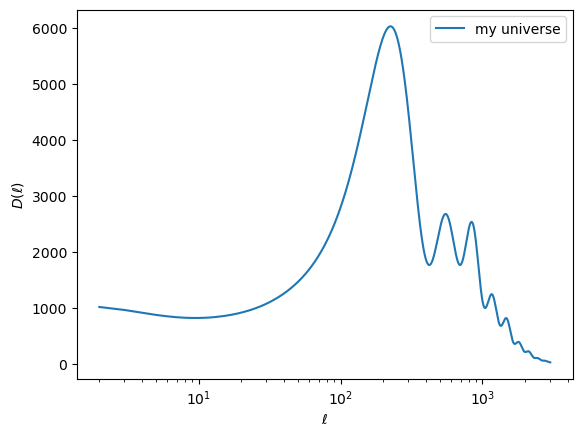

In [25]:
plt.figure(dpi = 100)
plt.plot(l_my_uni, Dl_TT_my_uni, label = 'my universe')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D(\ell)$')
plt.xscale('log')
plt.legend()
plt.show()

it is time to see what does observation tell us about the real universe we live.

In [26]:
planck18_data_path = 'planck/COM_PowerSpect_CMB-TT-full_R3.01.txt'
planck18_bf_path = 'planck/COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt'

# the datapoints
planck18_Dl_data = np.loadtxt(planck18_data_path)
l_planck18 = planck18_Dl_data[:, 0]
Dl_planck18 = planck18_Dl_data[:, 1]
dDlm_planck18 = planck18_Dl_data[:, 2]
dDlp_planck18 = planck18_Dl_data[:, 3]
Dl_err_planck18 = np.array([dDlm_planck18, dDlp_planck18])

# the best fit curve from the planck 2018 data
planck18_bf_data = np.loadtxt(planck18_bf_path)
calPlanck = 0.1000442E+01
l_planck18_bf = planck18_bf_data[:, 0] / calPlanck**2
Dl_TT_planck_bf = planck18_bf_data[:, 1] / calPlanck**2

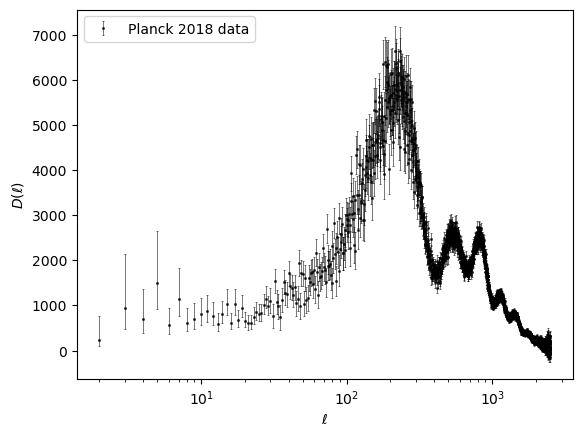

In [29]:
plt.figure(dpi = 100)
plt.errorbar(l_planck18, Dl_planck18, yerr = Dl_err_planck18, marker = 's', mfc = 'k', mec = 'k', ms = 1, ecolor = 'k', elinewidth = 0.5, linestyle = 'none', capsize = 1, capthick = 0.5, alpha = 0.75, zorder = 0, label = 'Planck 2018 data')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D(\ell)$')
plt.xscale('log')
plt.legend()
plt.show()

there are too many data points which makes it difficult to read. let's drop some of the points to make it prettier.

In [31]:
def pick_cmb_plot(cmb_data, threshold = 28):
    cmb_plot_length = int(threshold + len(cmb_data[threshold:]) / 5)
    cmb_plot = np.zeros(cmb_plot_length)
    cmb_plot[: threshold] = cmb_data[:threshold]
    for i in range(threshold, cmb_plot_length):
        index = threshold + 5 * (i - threshold)
        cmb_plot[i] = cmb_data[index]

    return cmb_plot

l_planck18_plot = pick_cmb_plot(l_planck18)
Dl_planck18_plot = pick_cmb_plot(Dl_planck18)
dDlm_planck18_plot = pick_cmb_plot(dDlm_planck18)
dDlp_planck18_plot = pick_cmb_plot(dDlp_planck18)
Dl_err_planck18_plot = np.array([dDlm_planck18_plot, dDlp_planck18_plot])

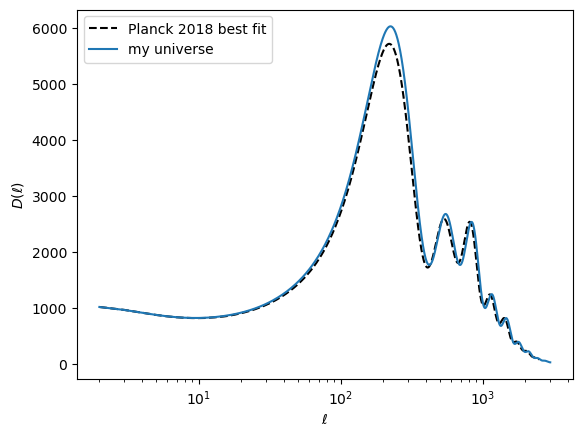

In [35]:
plt.figure(dpi = 100)
plt.errorbar(l_planck18_plot, Dl_planck18_plot, yerr = Dl_err_planck18_plot, marker = 's', mfc = 'k', mec = 'k', ms = 1, ecolor = 'k', elinewidth = 0.5, linestyle = 'none', capsize = 1, capthick = 0.5, alpha = 0.75, zorder = 0, label = 'Planck 2018 data')
plt.plot(l_planck18_bf, Dl_TT_planck_bf, color = 'k', linestyle = '--', label = 'Planck 2018 best fit')
plt.plot(l_my_uni, Dl_TT_my_uni, label = 'my universe')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D(\ell)$')
plt.xscale('log')
plt.legend()
plt.show()

now you can see that the universe we just created is different from the best fit of planck 2018.